In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.0.0
Eager execution: True


In [4]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

Local copy of the dataset file: /Users/elliot/.keras/datasets/iris_training.csv


In [5]:
# column order in CSV file
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [6]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [7]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_determinstic`.


In [8]:
features, labels = next(iter(train_dataset))

print(features)

OrderedDict([('sepal_length', <tf.Tensor: id=68, shape=(32,), dtype=float32, numpy=
array([6.2, 5. , 4.8, 5.7, 5. , 6.1, 6.4, 6.7, 6.5, 4.7, 7. , 6.7, 5.6,
       5.8, 6.4, 6.1, 5.4, 6.2, 6.6, 5.7, 4.5, 7.2, 6. , 4.6, 5.5, 5. ,
       5.8, 6.8, 4.6, 4.9, 6.4, 6.7], dtype=float32)>), ('sepal_width', <tf.Tensor: id=69, shape=(32,), dtype=float32, numpy=
array([3.4, 3.5, 3. , 2.9, 3.4, 3. , 2.8, 3.1, 3. , 3.2, 3.2, 3.3, 2.5,
       2.6, 2.7, 2.9, 3. , 2.2, 3. , 3.8, 2.3, 3. , 2.2, 3.6, 2.6, 3. ,
       4. , 3. , 3.2, 2.4, 3.2, 3.1], dtype=float32)>), ('petal_length', <tf.Tensor: id=66, shape=(32,), dtype=float32, numpy=
array([5.4, 1.6, 1.4, 4.2, 1.6, 4.9, 5.6, 4.4, 5.2, 1.6, 4.7, 5.7, 3.9,
       4. , 5.3, 4.7, 4.5, 4.5, 4.4, 1.7, 1.3, 5.8, 5. , 1. , 4.4, 1.6,
       1.2, 5.5, 1.4, 3.3, 4.5, 5.6], dtype=float32)>), ('petal_width', <tf.Tensor: id=67, shape=(32,), dtype=float32, numpy=
array([2.3, 0.6, 0.1, 1.3, 0.4, 1.8, 2.2, 1.4, 2. , 0.2, 1.4, 2.1, 1.1,
       1.2, 1.9, 1.4, 1.5, 1.5, 1

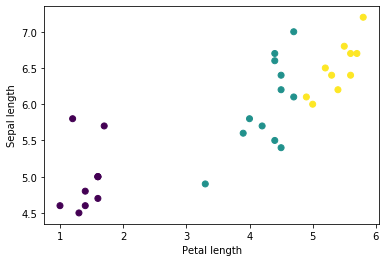

In [9]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

In [10]:
def pack_features_vector(features, labels):
  """Pack the features into a single array."""
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

In [11]:
train_dataset = train_dataset.map(pack_features_vector)

In [12]:
features, labels = next(iter(train_dataset))

print(features[:5])

tf.Tensor(
[[5.1 3.8 1.5 0.3]
 [5.8 4.  1.2 0.2]
 [5.7 3.  4.2 1.2]
 [7.4 2.8 6.1 1.9]
 [6.1 2.9 4.7 1.4]], shape=(5, 4), dtype=float32)


In [13]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # input shape required
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])

In [14]:
predictions = model(features)
predictions[:5]

<tf.Tensor: id=231, shape=(5, 3), dtype=float32, numpy=
array([[ 0.7075846 , -2.777469  ,  2.4699645 ],
       [ 0.7777596 , -2.9997916 ,  2.6688013 ],
       [ 0.7455467 , -3.112451  ,  4.012296  ],
       [ 0.9597407 , -3.8761873 ,  5.6545844 ],
       [ 0.78120095, -3.272707  ,  4.473336  ]], dtype=float32)>

In [21]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: id=253, shape=(5, 3), dtype=float32, numpy=
array([[1.4583768e-01, 4.4702324e-03, 8.4969211e-01],
       [1.3073353e-01, 2.9910067e-03, 8.6627549e-01],
       [3.6701206e-02, 7.7477063e-04, 9.6252406e-01],
       [9.0588201e-03, 7.1920884e-05, 9.9086928e-01],
       [2.4302635e-02, 4.2175822e-04, 9.7527564e-01]], dtype=float32)>

In [22]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
    Labels: [0 0 1 2 1 1 0 0 2 2 1 0 2 0 2 2 2 2 0 1 0 1 0 1 0 1 2 1 1 0 2 0]


In [23]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [26]:
def loss(model, x, y, training):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  y_ = model(x, training=training)

  return loss_object(y_true=y, y_pred=y_)


l = loss(model, features, labels, training=False)
print("Loss test: {}".format(l))

Loss test: 3.0247185230255127


In [27]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)